In [1]:
# Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.
# Investigate missing data and outliers.
# Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.
# Engage in feature creation by splitting, merging, or otherwise generating a new predictor.
# Using the dependent variable, perform both min-max and standard scaling in Python.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
df['SalePrice'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [31]:
df.describe().applymap(lambda x: f"{x:0.2f}")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [21]:
print("descriptive stats for SalePrice")
df.describe().applymap(lambda x: f"{x:0.1f}")["SalePrice"]

descriptive stats for SalePrice


count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: object

Text(0, 0.5, 'Frequency')

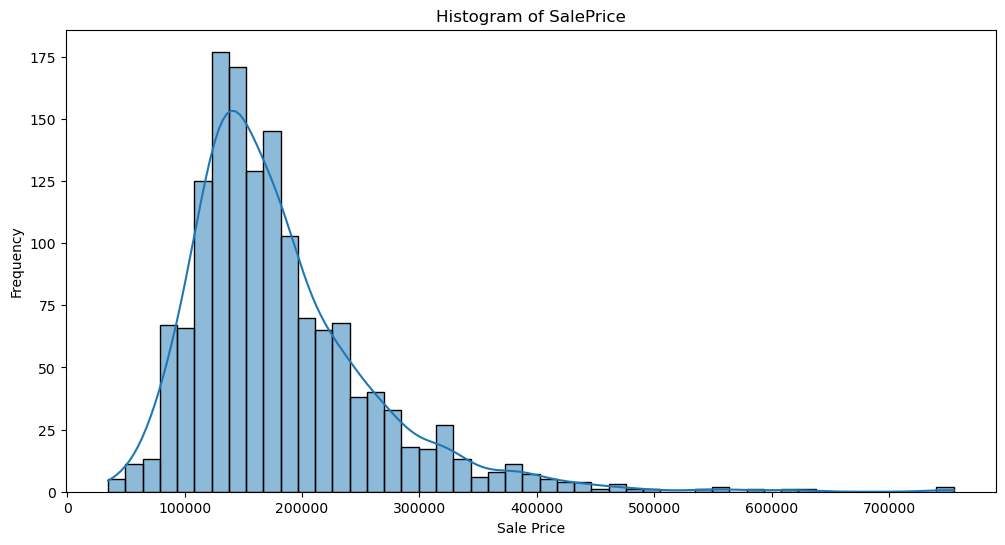

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Histogram of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

In [33]:
df['SalePrice'].isna().sum()

0

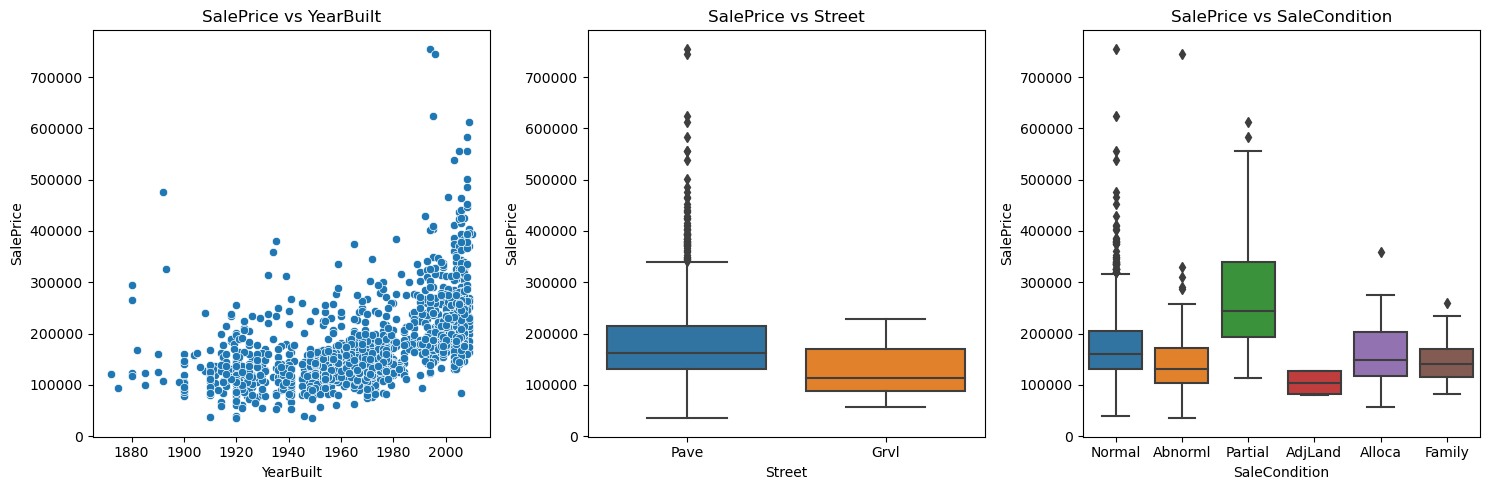

In [42]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice')
plt.title('SalePrice vs YearBuilt')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Street', y='SalePrice')
plt.title('SalePrice vs Street')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='SaleCondition', y='SalePrice')
plt.title('SalePrice vs SaleCondition')

plt.tight_layout()
plt.show()

In [44]:
df['NonlivingArea'] = df['GarageArea'] + df['PoolArea'] + df['WoodDeckSF']
# Display the first few rows to verify the new predictor
print(df['NonlivingArea'].head())

0     548
1     758
2     608
3     642
4    1028
Name: NonlivingArea, dtype: int64


In [46]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

sale_price = df[['SalePrice']]

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
sale_price_minmax_scaled = min_max_scaler.fit_transform(sale_price)

# Standard Scaling (Z-score normalization)
standard_scaler = StandardScaler()
sale_price_standard_scaled = standard_scaler.fit_transform(sale_price)

# Convert scaled arrays back to DataFrame for better visualization
sale_price_minmax_scaled_df = pd.DataFrame(sale_price_minmax_scaled, columns=['SalePrice_MinMaxScaled'])
sale_price_standard_scaled_df = pd.DataFrame(sale_price_standard_scaled, columns=['SalePrice_StandardScaled'])

# Concatenate original and scaled dataframes for comparison
scaled_df = pd.concat([sale_price, sale_price_minmax_scaled_df, sale_price_standard_scaled_df], axis=1)

# Display the first few rows of the scaled dataframe
print(scaled_df.head())

   SalePrice  SalePrice_MinMaxScaled  SalePrice_StandardScaled
0     208500                0.241078                  0.347273
1     181500                0.203583                  0.007288
2     223500                0.261908                  0.536154
3     140000                0.145952                 -0.515281
4     250000                0.298709                  0.869843


In [56]:

# Extract the dependent variable
sale_price = df['SalePrice']

# Min-Max Scaling
min_sale_price = sale_price.min()
max_sale_price = sale_price.max()
scaled_minmax = (sale_price - min_sale_price) / (max_sale_price - min_sale_price)

# Standard Scaling (Z-score normalization)
mean_sale_price = sale_price.mean()
std_sale_price = sale_price.std()
scaled_standard = (sale_price - mean_sale_price) / std_sale_price

# Convert scaled arrays back to DataFrame for better visualization
scaled_minmax_df = pd.DataFrame(scaled_minmax)
scaled_standard_df = pd.DataFrame(scaled_standard)

# Concatenate original and scaled dataframes for comparison
scaled_df = pd.concat([sale_price, scaled_minmax_df, scaled_standard_df], axis=1)

# Display the first few rows of the scaled dataframe
print(scaled_df.head())

   SalePrice  SalePrice  SalePrice
0     208500   0.241078   0.347154
1     181500   0.203583   0.007286
2     223500   0.261908   0.535970
3     140000   0.145952  -0.515105
4     250000   0.298709   0.869545
